## Introduction

Choosing the right neighborhood is essential for everyone who decided to settle down in the city. Whether you're a young undergraduate finding neighborhood next to the university, a family looking for good schools, or a retiree searching for a peaceful and quiet community, finding the best neighborhood can greatly enhance your quality of life. We'll analyze data on crime rates, obesity rates, home income, and school enrollment rates together to identify the top neighborhoods in Pittsburgh.

## Data pre-process

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
arrest_data = pd.read_csv('arrest.csv')
obesity_data = pd.read_csv('allegheny_county_obesity_rates.csv')
school_enrollment_data = pd.read_csv('finalproject.csv')

arrest_neighborhoods = arrest_data['INCIDENTNEIGHBORHOOD'].unique().tolist()
obesity_neighborhoods = obesity_data['City Neighborhood'].unique().tolist()
enrollment_neighborhoods = school_enrollment_data['neighborhood'].unique().tolist()

mapping_table = {
    'Central Business District': 'Central Business District',
    'California-Kirkbride': 'California Kirkbride',
    'Crawford-Roberts': 'Crawford Roberts',
    'Golden Triangle/Civic Arena': 'Golden Triangle',
    'Mt. Oliver Boro': 'Mount Oliver Borough',
    'Mount Oliver Neighborhood': 'Mount Oliver',
    'Mt. Oliver Neighborhood': 'Mount Oliver',
    'North oakland': 'North Oakland',
    'St. Clair': 'Saint Clair',
    'Southside Flats': 'South Side Flats',
    'Southside Slopes': 'South Side Slopes',
    "Troy Hill/Herr's Island": 'Troy Hill',
    'West oakland': 'West Oakland',
    'Spring Hill-Cityview': 'Spring Hill-City View',
}

arrest_data['INCIDENTNEIGHBORHOOD'] = arrest_data['INCIDENTNEIGHBORHOOD'].replace(mapping_table)
obesity_data['City Neighborhood'] = obesity_data['City Neighborhood'].replace(mapping_table)
school_enrollment_data['neighborhood'] = school_enrollment_data['neighborhood'].replace(mapping_table)

arrest_data.to_csv('arrest_data_standardized.csv', index=False)
obesity_data.to_csv('obesity_data_standardized.csv', index=False)
school_enrollment_data.to_csv('enrollment_data_standardized.csv', index=False)

## Metrics

## Sub-metric: Safety

In [3]:
arrest = pd.read_csv("arrest_data_standardized.csv")
safety_rank = arrest['INCIDENTNEIGHBORHOOD'].value_counts().rank(ascending = False)
index_s = safety_rank.index
safety_rank = pd.Series(range(1, 98), index = index_s)
print(safety_rank)

Central Business District     1
South Side Flats              2
Carrick                       3
East Allegheny                4
Homewood South                5
                             ..
Regent Square                93
Ridgemont                    94
Central Northside            95
Mount Oliver Borough         96
Troy Hill-Herrs Island       97
Length: 97, dtype: int64


## Sub-metric: Obesity

In [4]:
df = pd.read_csv('obesity_data_standardized.csv')
neighborhood_means = df.groupby('City Neighborhood')['2006-2010 estimate of obesity'].mean()
arrest = pd.read_csv("arrest_data_standardized.csv")

neighborhood_means = neighborhood_means.sort_values()
obesity_rank = neighborhood_means.rank(ascending=False)
obesity_rank = obesity_rank.sort_values()
print(obesity_rank)

City Neighborhood
Northview Heights        1.0
Fairywood                2.0
California Kirkbride     3.0
Saint Clair              4.0
Terrace Village          5.0
                        ... 
Central Oakland         86.0
Shadyside               87.0
Squirrel Hill North     88.0
North Oakland           89.0
North Shore             90.0
Name: 2006-2010 estimate of obesity, Length: 90, dtype: float64


## Sub-metric: Home Income

In [5]:
neib = pd.read_csv('neib_Data.csv')
sort_by_value = neib.sort_values("Median_Home_Value")
sort_by_change = neib.sort_values("Change_Real_Value")

sort_neib_value = []
sort_neib_change = []

for i, row in sort_by_value.iterrows():
    sort_neib_value.append(row['SNAP_All_csv_Neighborhood'])
for i, row in sort_by_change.iterrows():
    sort_neib_change.append(row['SNAP_All_csv_Neighborhood'])

df_value = pd.DataFrame(sort_neib_value, columns=['Neighborhoods'])
df_change = pd.DataFrame(sort_neib_change, columns=['Neighborhoods'])

dic = {}
for i, row in df_value.iterrows():
    dic[row['Neighborhoods']] = 0.7 * (i+1)
for i, row in df_change.iterrows():
    if row['Neighborhoods'] in dic:
        dic[row['Neighborhoods']] = dic[row['Neighborhoods']] + 0.3 * (i+1)
        
df_total_score = pd.DataFrame({'Neighborhoods': list(dic.keys()), 'Score': list(dic.values())})
sort_by_score = df_total_score.sort_values("Score")

income_rank_dic = []
for i, row in sort_by_score.iterrows():
    income_rank_dic.append(row['Neighborhoods'])

income_rank = pd.Series(range(1, 86), index = income_rank_dic)
print(income_rank)

Bluff                1
Homewood West        2
Larimer              3
West End             4
Homewood North       5
                    ..
South Side Flats    81
Highland Park       82
Central Oakland     83
Regent Square       84
Shadyside           85
Length: 85, dtype: int64


## Sub-metric: Enrollment by School and Neighborhood

In [6]:
parking= pd.read_csv("enrollment_data_standardized.csv")
school_enrollment_rank = parking['neighborhood'].value_counts().rank(ascending = False)
index_e = school_enrollment_rank.index
school_enrollment_rank = pd.Series(range(1, 88), index = index_e)
print(school_enrollment_rank)

Carrick             1
East Liberty        2
Knoxville           3
Brookline           4
Garfield            5
                   ..
Esplen             83
Bluff              84
Golden Triangle    85
Saint Clair        86
Ridgemont          87
Length: 87, dtype: int64


## Determine The Best Neighborhood

In [7]:
pd.set_option('display.max_rows', None)
total_scores = safety_rank * 1/4 + obesity_rank * 1/4 + income_rank * 1/4 + school_enrollment_rank *1/4 
print(total_scores.sort_values(ascending=False))

Regent Square                84.25
Ridgemont                    75.75
Swisshelm Park               75.50
Friendship                   73.25
Central Oakland              72.75
Duquesne Heights             72.50
North Oakland                71.75
Oakwood                      71.50
Summer Hill                  70.00
New Homestead                68.50
Squirrel Hill North          66.25
Shadyside                    63.25
Point Breeze                 62.00
Central Northside            61.75
Polish Hill                  59.75
Morningside                  59.50
Banksville                   59.50
South Oakland                58.75
East Carnegie                58.75
Chartiers City               58.25
Hays                         57.25
Esplen                       55.00
Allegheny Center             54.75
Lower Lawrenceville          53.75
Westwood                     53.75
Highland Park                53.75
Lincoln Place                53.00
Windgap                      53.00
Squirrel Hill South 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

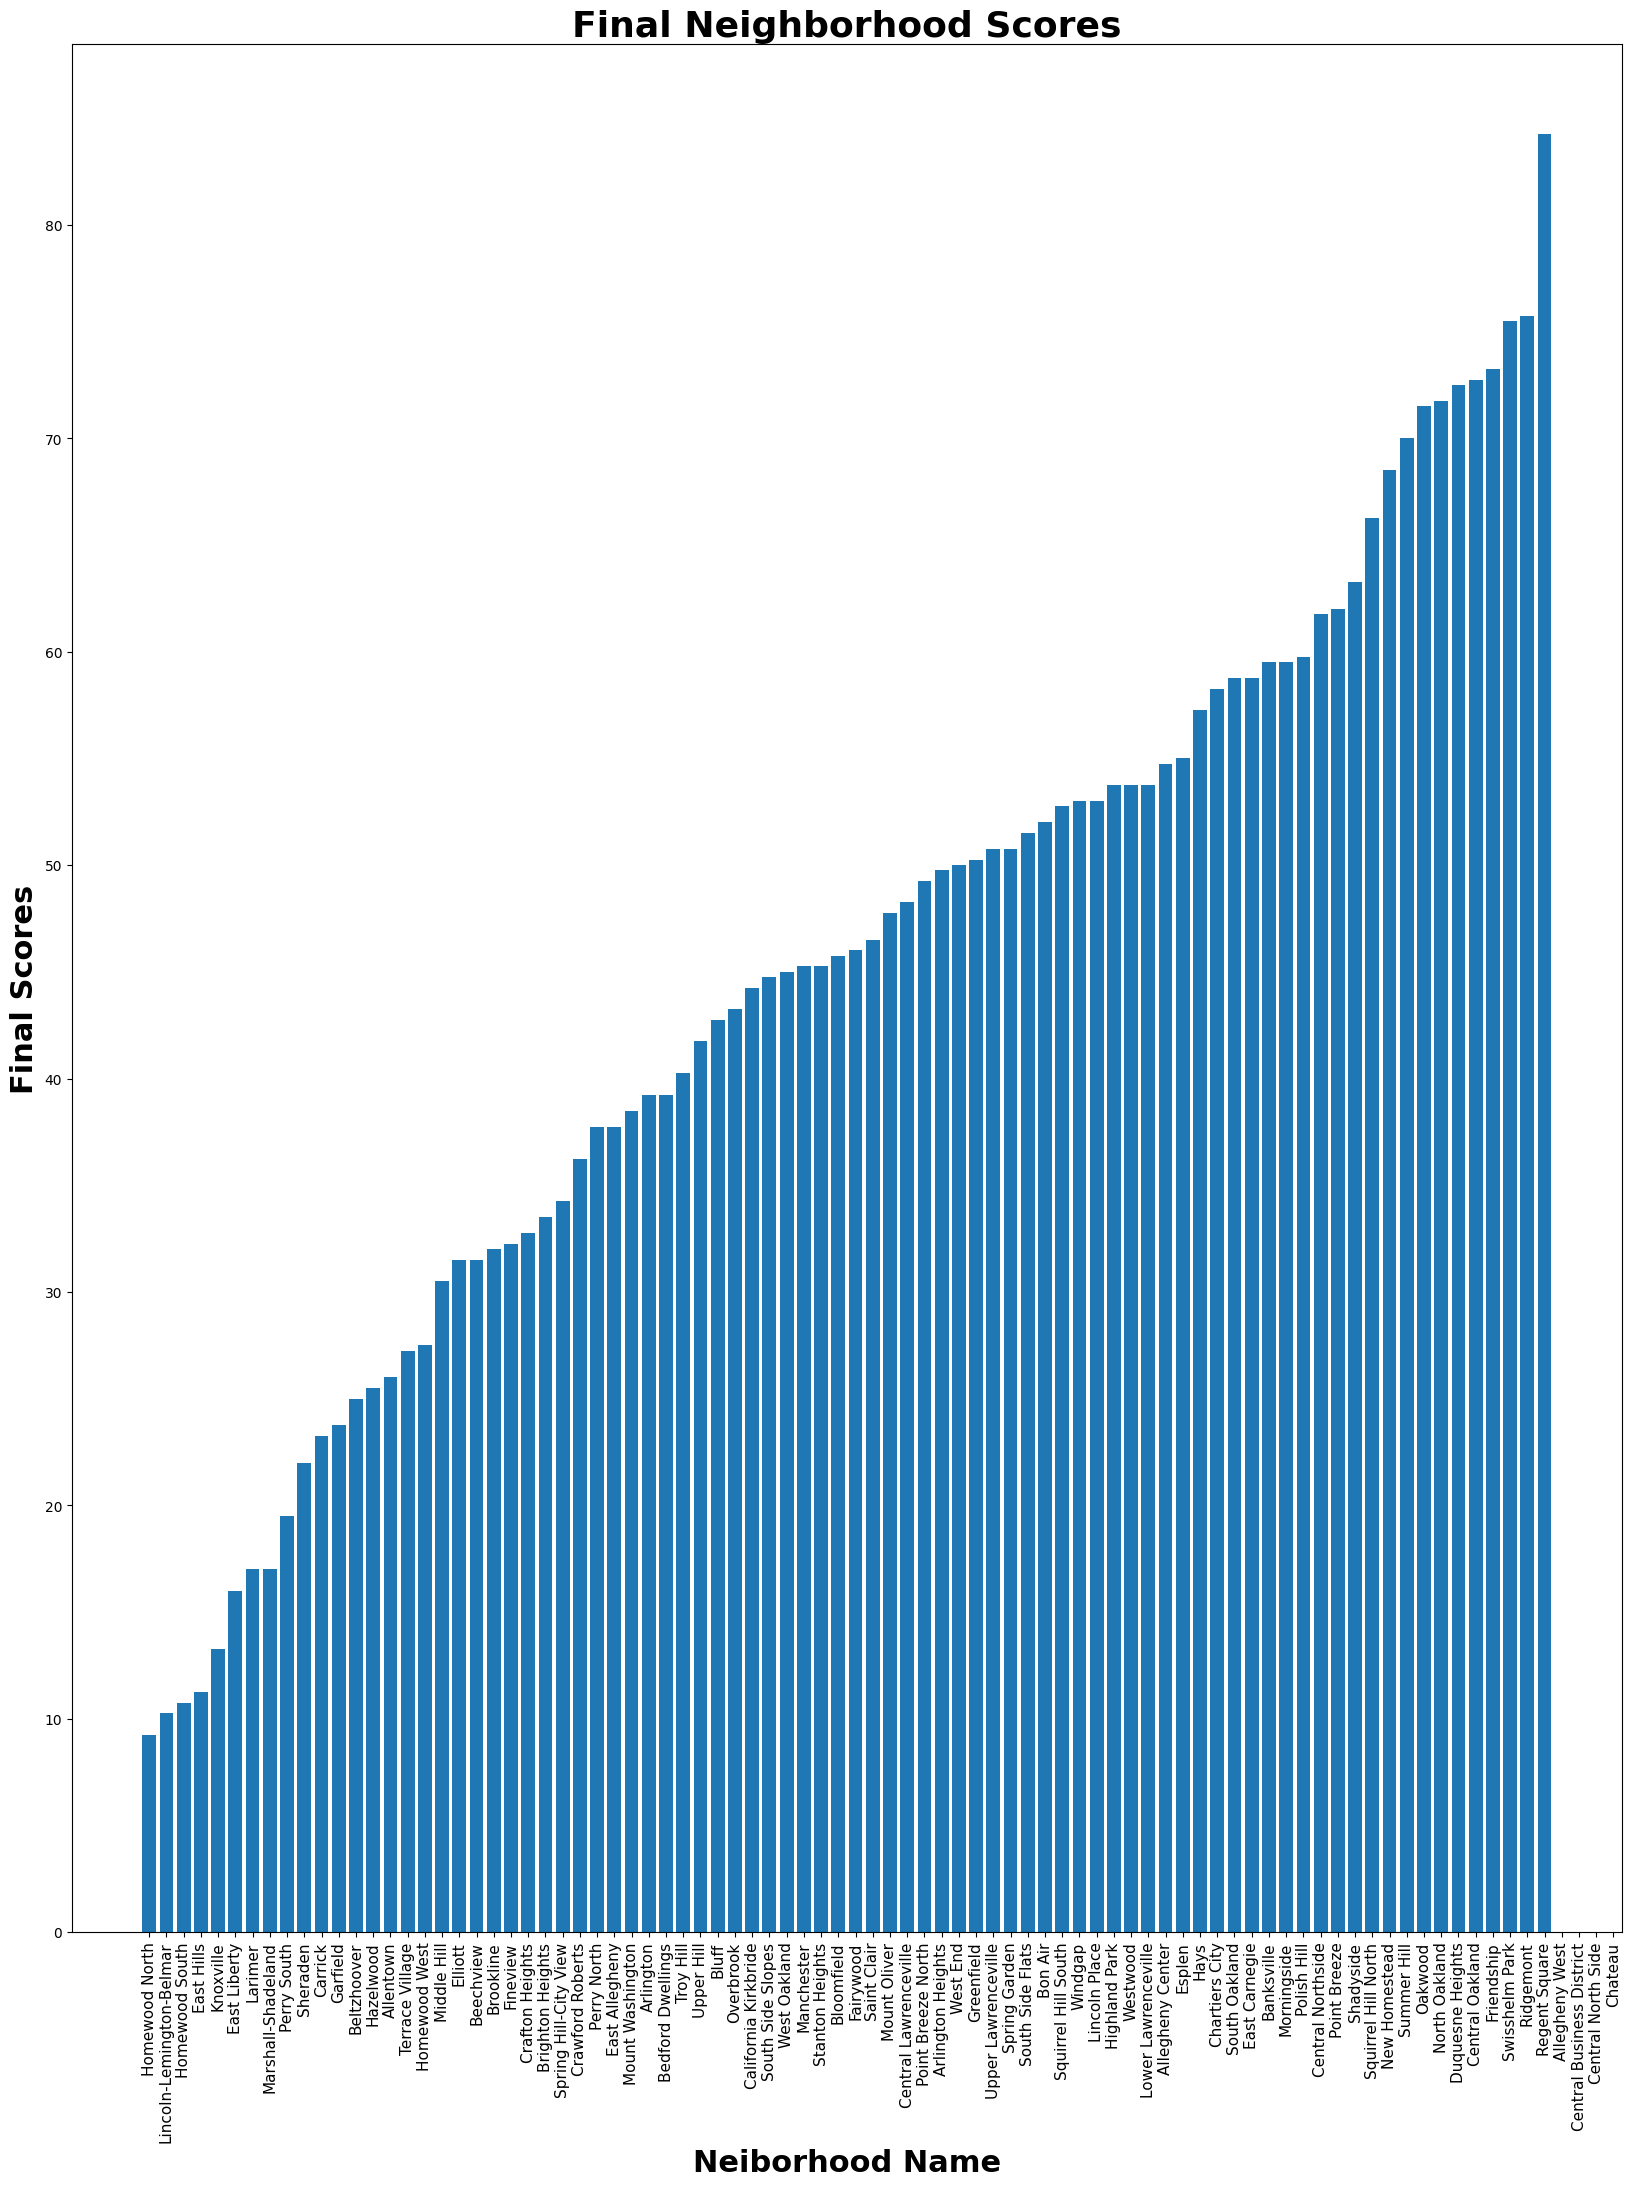

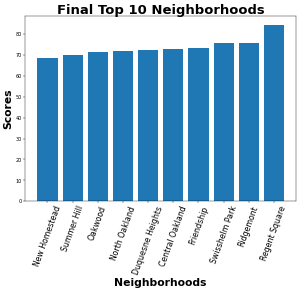

In [8]:
final_values = []
final_neighborhoods = total_scores.index

for val in total_scores:
    final_values.append(val)
df_final_scores = pd.DataFrame({'Neighborhoods': final_neighborhoods, 'Scores': final_values})
df_final_scores = df_final_scores.sort_values('Scores')

final_top_10_neighborhoods = df_final_scores.iloc[72:83]

fig, axes = plt.subplots(figsize=(20,25), dpi=100)
plt.bar(df_final_scores.Neighborhoods, height=df_final_scores.Scores)
plt.title('Final Neighborhood Scores', fontsize = 26, fontweight = 'bold')
plt.ylabel('Final Scores', fontsize = 22, fontweight = 'bold')
plt.xlabel('Neiborhood Name', fontsize = 22, fontweight = 'bold')
plt.xticks(rotation=90, fontsize = 11)

fig, axes = plt.subplots(figsize=(10,7), dpi=35)
plt.bar(final_top_10_neighborhoods.Neighborhoods, height=final_top_10_neighborhoods.Scores)
plt.title('Final Top 10 Neighborhoods', fontsize = 27, fontweight = 'bold')
plt.ylabel('Scores', fontsize = 22, fontweight = 'bold')
plt.xlabel('Neighborhoods', fontsize = 22, fontweight = 'bold')
plt.xticks(rotation=70, fontsize = 16)

## Conclusion

According to our weighted scores, the top three neighborhoods are Regent Square(1st), Ridgemont(2nd), and Swisshelm Park(3nd).

Each of our submetric perfectly reflected each part of a essential part of living in a neighborhood. While household income represented a community's overall economic situation, police arrest rate corresponding to safety, obesity representing health, and school enrollment rate symbolizing education.

After our calculation using the rank metric, we concluded that our top three neighborhoods are Regent Square(1st), Ridgemont(2nd), and Swisshelm Park(3nd).

Because our submetric is calculated separately, we all recevied different result based on the scores; In terms of safety/police arrest rate, the top 5 safest neighborhoods are Mt. Oliver Neighborhood, Troy Hill-Herrs Island, Mt. Oliver Boro, Central Northside, Rigdemont with Regent Square(our total top 1) following up; the top 5 neighborhoods with the lowest rate of obesity are North Oakland, North Shore, Squirrel Hill North, Shadyside and Central Oakland with Regent Square(our total top 1) ranked 7th; the top 5 highest enrolled students in Pittsburgh neighbourhood are Carrick, BrookLine, BeechView, Sheraden and, Squirrel Hill South(Regent square is not shown in the top 50 in student enrollment data); the top 5 neighborhoods are Shadyside, Regent Square, Central Oakland, Highland Park, and South Side Flats.

As shown above graphically and literally, Regent Square are listed in the top 5 in 3 of our 4 submetrics. However, Regent Sqaure did not shown as a top neighborhood school enrollment rate.